### **1**

1. Defina dos listas de valores `x` e `y`, tal que los pares (x,y) cumplan una relación lineal del tipo $y = 2x + 1$. Defina la lista de valores de `x` con 100 puntos en el intervalo de valores que van desde -1 hasta 1.

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import pandas as pd

# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)

In [3]:
x = np.linspace(-1,1,100,endpoint=False)
y = 1 + 2 * x

2. Grafique la curva generada por los valores (x,y) en color verde, con un ancho `linewidth = 3` y que sea una línea a trazos `linestyle = '--'`. Agregue al gráfico el título 'Relación Lineal'.

[Text(0.5, 1.0, 'Relación Lineal')]

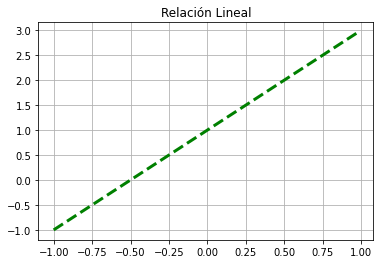

In [4]:
fig, ax = plt.subplots()
ax.grid()
ax.plot(x,y, color='green', linewidth=3, linestyle='--')
ax.set(title='Relación Lineal')

### **2**

Graficar tres subplots, con las curvas (x1,y1),(x2,y2) y (x3,y3), en una única figura. Apilar los subplots en forma vertical y de manera que compartan el eje x.

[(0.0, 2.0)]

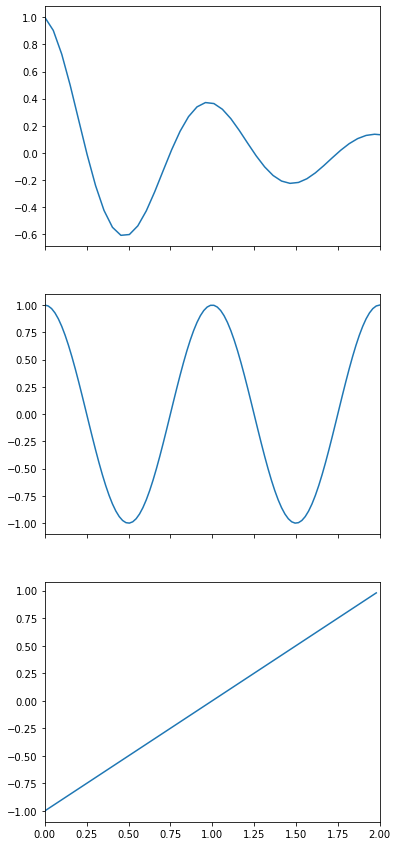

In [5]:
x1 = np.linspace(0.0, 5.0, 100)
x2 = np.linspace(0.0, 2.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
x3 = np.linspace(0,2,100,endpoint=False)
y3 = -1 + x3
fig, axes = plt.subplots(3,1,sharex=True, figsize=(6,15))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)
axes[2].plot(x3, y3)
axes[0].set(xlim = (0,2))

### **3**
1. ¿Por qué cree que se forman esas líneas horizontales en el gráfico?
2. ¿Qué conclusiones pueden sacar sobre la relación de precio y puntaje observando este gráfico?
3. Tome solo los vinos realizados en Argentina (recuerde usar una máscara) y realice nuevamente un scatter plot de precio vs puntaje para estos vinos.

1. Las líneas horizontales es una representación de muchos puntos (datos) acumulados con muy poco intervalo, lo que hace que visualmente se vea como una línea.  
2. En general, cuando el puntaje es más alto, también aumenta el precio.  

[Text(0.5, 0, 'Precio (usd)'),
 Text(0, 0.5, 'Puntaje'),
 Text(0.5, 1.0, 'Precio vs. puntaje en vinos argentinos')]

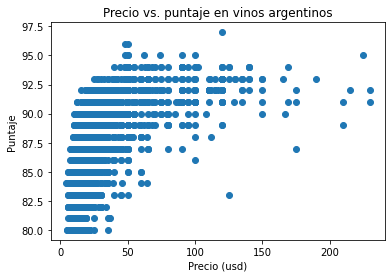

In [6]:
x = wine_reviews[wine_reviews['country']=='Argentina'].price.values
y = wine_reviews[wine_reviews['country']=='Argentina'].points.values

fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos argentinos')

### **4**

1. Repitan el histograma anterior, pero esta vez cambiando el número de `bins`. Por ejemplo, probar con 5, 50, 500 y 5000. ¿Cuál les parece la opción más adecuada? ¿De qué dependará el número de bins adecuado a seleccionar?

2. Prueben qué sucede si no le pasan el argumento `bins` a la función. Busquen en la bibliografía de la librería que es lo que hace por default la función.

(array([  6.,  12.,  64., 150., 226., 247., 184.,  78.,  28.,   5.]),
 array([ 6.84324017,  9.37411502, 11.90498987, 14.43586471, 16.96673956,
        19.49761441, 22.02848926, 24.55936411, 27.09023896, 29.62111381,
        32.15198866]),
 <BarContainer object of 10 artists>)

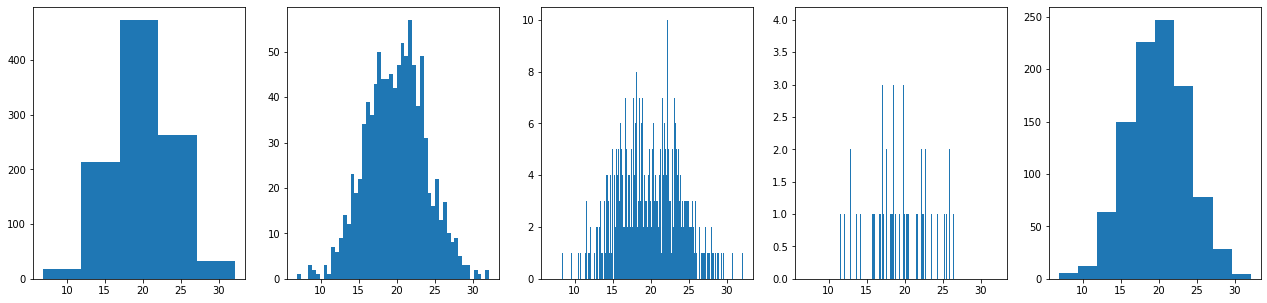

In [8]:
mu = 20  # Media de la distribución
sigma = 4  # Desviación Estandar
valores = mu + sigma * np.random.randn(1000)

fig, axes = plt.subplots(1,5, figsize=(22,5))

# Ploteamos el histograma
axes[0].hist(valores, bins = 5)
axes[1].hist(valores, bins = 50)
axes[2].hist(valores, bins = 500)
axes[3].hist(valores, bins = 5000)
axes[4].hist(valores)

1. El número adecuado de bins se calcula como la raíz cuadrada de la muestra, redondeado hacia arriba.  
2. En caso de no pasarle el argumento de bins...

**Nota**: la función `hist` además nos devuelve dos vectores relevantes. El vector `n` donde nos especifica el número de cuentas de cada bin (columna) del histograma. Y el vector `bins`, que nos dice los límites de estos bines (donde empieza y termina cada columna. Noten que el vector 'bins' tiene un largo igual a `len(n)+1`.

Como último ejemplo, vamos a graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

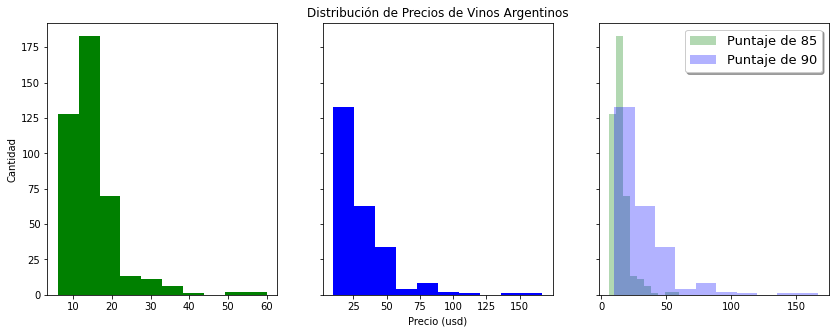

In [10]:
ARG_wr = wine_reviews[wine_reviews['country']=='Argentina']

fig, axes = plt.subplots(1,3, sharey=True, figsize=(14,5))

# Ploteamos el histograma
axes[0].hist(ARG_wr[ARG_wr['points']==85].price.values,facecolor='g', label='Puntaje de 85')
axes[1].hist(ARG_wr[ARG_wr['points']==90].price.values,facecolor='b', label='Puntaje de 90')
axes[2].hist(ARG_wr[ARG_wr['points']==85].price.values,alpha = 0.3,facecolor='g', label='Puntaje de 85')
axes[2].hist(ARG_wr[ARG_wr['points']==90].price.values,alpha = 0.3,facecolor='b', label='Puntaje de 90')
axes[0].set(ylabel='Cantidad')
axes[1].set(xlabel='Precio (usd)', title='Distribución de Precios de Vinos Argentinos')
axes[2].legend(loc='upper right', shadow=True, fontsize=13)